###                                                                                         Name: Sharon Laurance Muthipeedika 
###                                                                                         Matriculation No: 312486

## Exercise 2: Linear Regression with Gradient Descent

### Part A: (Datasets)
 - Airfare and demand: target − > price
 - Wine Quality: target − > quality
 - Parkisons Dataset: target − > total_UPDRS
    

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Date Pre-processing

In [2]:
airline_dataframe=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 3\\datasets\\airq402.data",header=None,delim_whitespace=True)

In [3]:
airline_dataframe.columns =['City1', 'City2', 'Average_Fare', 'Distance',
                            'Average_weekly_passengers', 'market_leading_airline', 
                            'market_share', 'Average_fare', 'Low_price_airline', 'market_share_2','price']

In [4]:
airline_dataframe

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share_2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,73.44


In [5]:
airline_dataframe.corr()

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share_2,price
Average_Fare,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410
Distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239
Average_weekly_passengers,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314
market_share,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672
Average_fare,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511
market_share_2,-0.458660,-0.367831,0.034241,0.306832,-0.472838,1.000000,-0.240186
price,0.866410,0.583239,-0.142314,-0.307672,0.826511,-0.240186,1.000000


In [6]:
wine_quality=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 3\\datasets\\winequality-red.csv",delimiter=';')

In [7]:
wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
wine_quality.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [9]:
parkinsons_dataset=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 3\\datasets\\parkinsons_updrs.data",delimiter=',')

In [10]:
parkinsons_dataset.corr()[["total_UPDRS"]]

,total_UPDRS
subject#,0.253643
age,0.310290
sex,-0.096559
test_time,0.075263
motor_UPDRS,0.947231
total_UPDRS,1.000000
Jitter(%),0.074247
Jitter(Abs),0.066927
Jitter:RAP,0.064015
Jitter:PPQ5,0.063352


In [11]:
airline_dataframe["Low_price_airline"].unique()

array(['FL', 'DL', 'CO', 'WN', 'US', 'AA', 'F9', 'HP', 'NW', 'AX', 'UA',
       'NK', 'TZ', 'AS', 'B6', 'AQ', 'G4', 'YX', 'SY'], dtype=object)

In [12]:
airline_dataframe

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share_2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,73.44


#### 1. Convert any non-numeric values to numeric values. For example you can replace a country name with an integer value or more appropriately use hot-one encoding. [Hint: use pandas.get_dummies].Please explain your solution.

In airline demand Dataset there are 4 non-numeric columns which are converted to number values for city1 every city is converted to a column and 0 indicates it has no value and 1 indicated values exist for that city

Convert categorical variable into dummy/indicator variables.

In [13]:
airline_df=pd.get_dummies(data=airline_dataframe, columns=['City1', 'City2','market_leading_airline', 'Low_price_airline'])
airline_df.columns
airline_df

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share_2,price,City1_ABQ,City1_ACY,City1_ALB,...,Low_price_airline_G4,Low_price_airline_HP,Low_price_airline_NK,Low_price_airline_NW,Low_price_airline_SY,Low_price_airline_TZ,Low_price_airline_UA,Low_price_airline_US,Low_price_airline_WN,Low_price_airline_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,136.16,1104,184.34,33.37,135.82,28.65,118.51,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,83.28,200,232.71,99.57,82.55,99.57,82.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,159.97,814,843.80,46.19,159.65,13.89,159.02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,73.57,174,214.45,99.74,73.44,99.74,73.44,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
airline_df.dropna(axis=0)

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share_2,price,City1_ABQ,City1_ACY,City1_ALB,...,Low_price_airline_G4,Low_price_airline_HP,Low_price_airline_NK,Low_price_airline_NW,Low_price_airline_SY,Low_price_airline_TZ,Low_price_airline_UA,Low_price_airline_US,Low_price_airline_WN,Low_price_airline_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,136.16,1104,184.34,33.37,135.82,28.65,118.51,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,83.28,200,232.71,99.57,82.55,99.57,82.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,159.97,814,843.80,46.19,159.65,13.89,159.02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,73.57,174,214.45,99.74,73.44,99.74,73.44,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### 2. If required drop out the rows with missing values or NA. In next lectures we will handle sparse data, which will allow us to use records with missing values.

Arguments :
axis:
0 , to drop rows with missing values
1 , to drop columns with missing values
how:
‘any’ : drop if any NaN / missing value is present
‘all’ : drop if all the values are missing / NaN
thresh: threshold for non NaN values
inplace: If True then make changes in the dataplace itself

In [15]:
airline_df.dropna(axis=0,inplace=True)
airline_df

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share_2,price,City1_ABQ,City1_ACY,City1_ALB,...,Low_price_airline_G4,Low_price_airline_HP,Low_price_airline_NK,Low_price_airline_NW,Low_price_airline_SY,Low_price_airline_TZ,Low_price_airline_UA,Low_price_airline_US,Low_price_airline_WN,Low_price_airline_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,136.16,1104,184.34,33.37,135.82,28.65,118.51,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,83.28,200,232.71,99.57,82.55,99.57,82.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,159.97,814,843.80,46.19,159.65,13.89,159.02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,73.57,174,214.45,99.74,73.44,99.74,73.44,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
wine_quality.dropna(axis=0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [17]:
parkinsons_dataset.dropna(axis=0)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


#### 3. Split the dataset into 80% Train set and 20% Test set.

In [18]:
split = np.random.rand(len(airline_df)) < 0.8
airline_train = airline_df[split]
airline_test = airline_df[~split]

In [19]:
airline_train

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share_2,price,City1_ABQ,City1_ACY,City1_ALB,...,Low_price_airline_G4,Low_price_airline_HP,Low_price_airline_NK,Low_price_airline_NW,Low_price_airline_SY,Low_price_airline_TZ,Low_price_airline_UA,Low_price_airline_US,Low_price_airline_WN,Low_price_airline_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,288.14,2329,787.50,46.51,329.20,30.43,252.34,0,0,0,...,0,0,0,0,0,0,0,0,0,0
995,136.16,1104,184.34,33.37,135.82,28.65,118.51,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,83.28,200,232.71,99.57,82.55,99.57,82.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,159.97,814,843.80,46.19,159.65,13.89,159.02,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
split = np.random.rand(len(airline_df)) < 0.8
airline_train = airline_df[split]
airline_test = airline_df[~split]

In [21]:
split = np.random.rand(len(wine_quality)) < 0.8
wine_quality_train = wine_quality[split]
wine_quality_test = wine_quality[~split]

In [22]:
split = np.random.rand(len(parkinsons_dataset)) < 0.8
parkinsons_dataset_train = parkinsons_dataset[split]
parkinsons_dataset_test = parkinsons_dataset[~split]

In [23]:
wine_quality_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
14,8.9,0.62,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.0,4
25,6.3,0.39,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1578,6.8,0.67,0.15,1.8,0.118,13.0,20.0,0.99540,3.42,0.67,11.3,6
1586,7.5,0.31,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6
1591,5.4,0.74,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [24]:
#This is another way of splitting train test sample by using random state as a seed value
wine_train=wine_quality.sample(frac=0.8,random_state=200) #random state is a seed value
wine_test=wine_quality.drop(wine_train.index)

In [25]:
wine_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,5
15,8.9,0.62,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
17,8.1,0.56,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1566,6.7,0.16,0.64,2.1,0.059,24.0,52.0,0.99494,3.34,0.71,11.2,6
1569,6.2,0.51,0.14,1.9,0.056,15.0,34.0,0.99396,3.48,0.57,11.5,6
1570,6.4,0.36,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4,6
1573,6.0,0.58,0.20,2.4,0.075,15.0,50.0,0.99467,3.58,0.67,12.5,6


#### 4. Are there any columns that can be dropped? if so, which ones are why

#### Are there any columns that can be dropped? if so, which ones are why.- Columns that have negative correlation with target column can be dropped in all three datasets. <br> Also columns have high positive correlation with each other need to be dropped for the linear regression model to work better

In [26]:
airline_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   City1                      1000 non-null   object 
 1   City2                      1000 non-null   object 
 2   Average_Fare               1000 non-null   float64
 3   Distance                   1000 non-null   int64  
 4   Average_weekly_passengers  1000 non-null   float64
 5   market_leading_airline     1000 non-null   object 
 6   market_share               1000 non-null   float64
 7   Average_fare               1000 non-null   float64
 8   Low_price_airline          1000 non-null   object 
 9   market_share_2             1000 non-null   float64
 10  price                      1000 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


<AxesSubplot:title={'center':'price'}, xlabel='Low_price_airline'>

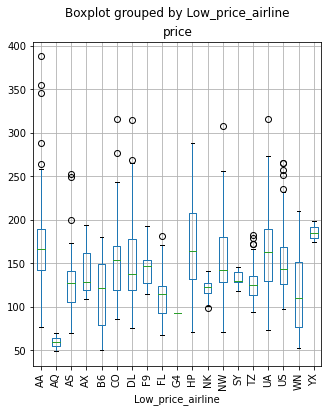

In [27]:
airline_dataframe.boxplot('price','Low_price_airline',rot = 90,figsize=(5,6))

In [28]:
cat_df_flights = airline_dataframe.select_dtypes(include=['object']).copy()
cat_df_flights.head()

,City1,City2,market_leading_airline,Low_price_airline
0,CAK,ATL,FL,FL
1,CAK,MCO,FL,DL
2,ALB,ATL,DL,CO
3,ALB,BWI,WN,WN
4,ALB,ORD,UA,WN


In [29]:
print(cat_df_flights['Low_price_airline'].value_counts())

WN    230
DL    151
AA    129
US    101
FL     60
HP     58
UA     55
CO     45
TZ     34
NW     33
F9     30
AS     27
NK     16
B6     15
SY      7
AX      3
YX      3
AQ      2
G4      1
Name: Low_price_airline, dtype: int64


C:\Users\Sharon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


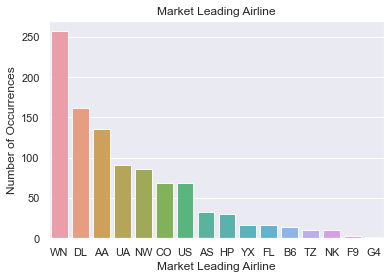

In [30]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = cat_df_flights['market_leading_airline'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Market Leading Airline')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Market Leading Airline', fontsize=12)
plt.show()

C:\Users\Sharon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


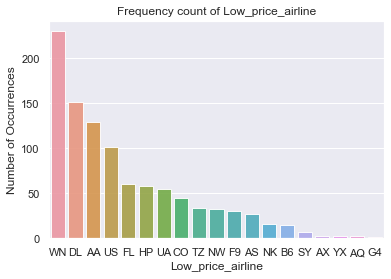

In [31]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = cat_df_flights['Low_price_airline'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency count of Low_price_airline')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Low_price_airline', fontsize=12)
plt.show()

#### References:
 * https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas
 * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
 * https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
 * https://www.codegrepper.com/code-examples/python/split+dataframe+into+80+20